# Tracing

In particular, we provide two tracing methods to help you develop and improve the Generator:

1. Trace the history change(states) on prompt during your development process. Developers typically go through a long process of prompt optimization and it is frustrating to lose track of the prompt changes when your current change actually makes the performance much worse.


In [1]:
from IPython.display import clear_output

!pip install -U adalflow[openai,groq,faiss-cpu]

clear_output()


In [2]:
import os
from getpass import getpass

# Prompt user to enter their API keys securely
openai_api_key = getpass("Please enter your OpenAI API key: ")
groq_api_key = getpass("Please enter your GROQ API key: ")

# Set environment variables
os.environ['OPENAI_API_KEY'] = openai_api_key
os.environ['GROQ_API_KEY'] = groq_api_key

print("API keys have been set.")


Please enter your OpenAI API key: ··········
Please enter your GROQ API key: ··········
API keys have been set.


We created a GeneratorStateLogger to handle the logging and saving into json files. To further simplify developers’s process, we provides a class decorator trace_generator_states where a single line of code can be added to any of your task component. It will automatically track any attributes of type Generator.

In [13]:
from adalflow.tracing import trace_generator_states
from adalflow.core import Component, Generator
import adalflow as adal
from adalflow.components.model_client import OpenAIClient

template_doc = r"""<SYS> You are a doctor </SYS> User: {{input_str}}"""

@trace_generator_states()
class DocQA(adal.Component):
    def __init__(self):
        super(DocQA, self).__init__()
        self.generator = Generator(
            template=template_doc,
            model_client=OpenAIClient(),
            model_kwargs={"model": "gpt-4o-mini"},
        )

    def call(self, query: str) -> str:
        return self.doc(prompt_kwargs={"input_str": query}).data


Here is the folder structer of where the trace is generated as a .json file and also an example output below

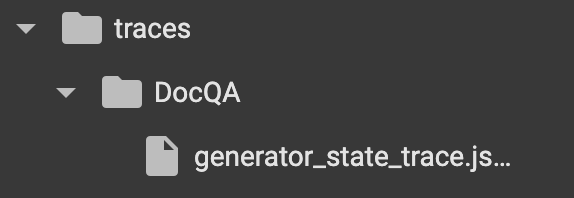

In [ ]:
'''
 {
    "doc": [
        {
            "prompt_states": {
                "type": "Prompt",
                "data": {
                    "_components": {
                        "_ordered_dict": true,
                        "data": []
                    },
                    "_parameters": {
                        "_ordered_dict": true,
                        "data": []
                    },
                    "training": false,
                    "teacher_mode": false,
                    "tracing": false,
                    "name": "Prompt",
                    "_init_args": {
                        "template": null,
                        "prompt_kwargs": {}
                    },
                    "template": "<SYS> You are a doctor </SYS> User: {{input_str}}",
                    "prompt_variables": [
                        "input_str"
                    ],
                    "prompt_kwargs": {}
                }
            },
            "time_stamp": "2024-11-29T12:36:33.302956"
        }
    ]
}
'''